# Classification of Cervical Cancer Dataset


> Project By : **Harshit Singh** and **Poorvi Singh**

> Roll No. : **226511** and **226517**

#### Cervical  cancer  is  the  leading  gynecological  malignancy  worldwide.  This  paper  presents  diverse  classification techniques and shows the advantage of feature selection approaches to the best predicting of cervical cancer disease. There are thirty-two attributes with eight hundred and fifty-eight samples. Besides, this data suffers of missing values and  imbalance  data.  Therefore,  over-sampling,  under-sampling  and  imbedded  over  and  under  sampling  have  been used.  Furthermore,  dimensionality  reduction  techniques  are  required  for  improving  the  accuracy  of  the  classifier. Therefore,  feature  selection  methods  have  been  studied  as  they  divided  into  two  distinct  categories,  filters  and wrappers. The results show that age, first sexual intercourse, number of pregnancies, smokes, hormonal contraceptives and STDs:genital herpes are the main predictive features with high accuracy with 97.5%. Decision Tree classifier is shown to be advantageous in handling classification assignment with excellent performance.

## This dataset is taken from UCI Machine Learning Repository.

#### Description of the dataset:
* The dataset contains 36 columns and 858 data points.

### Importing Basic Libraries for Data Analysis and Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Reading Data

In [2]:
df = pd.read_csv("risk_factors_cervical_cancer.csv")
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0


## Data Description

> ##### **Age:** Age of the patient

> ##### **Number of sexual partners:** Number of sexual partners of the patient

> ##### **First sexual intercourse:** Age of first sexual intercourse

> ##### **Num of pregnancies:** Number of pregnancies of the patient

> ##### **Smokes:** Smoking habit of the patient (1 = yes; 0 = no)

> ##### **Smokes (years):** Number of years that the patient has been smoking

> ##### **Smokes (packs/year):** Number of packs of cigarettes smoked by the patient per year

> ##### **Hormonal Contraceptives:** Use of hormonal contraceptives by the patient (1 = yes; 0 = no), tablets containing the hormones like progesterone/estrogen to block pregnancies. 

> ##### **Hormonal Contraceptives (years):** Number of years of use of hormonal contraceptives.

> ##### **IUD:** Use of intrauterine device by the patient (1 = yes; 0 = no), Inter-uterine devices , these are also a contraceptive device fitted inside the uterus & physically preventing pregnancies.

> ##### **IUD (years):** Number of years of use

> ##### **STDs:** Sexually transmitted diseases of the patient (1 = yes; 0 = no). Sexually transmitted diseases are infections that are spread from one person to another through sexual contact.

> ##### **STDs (number):** Number of distinct types of STDs

> ##### **STDs:condylomatosis:** Presence of condylomatosis (1 = yes; 0 = no)

> ##### **STDs:cervical condylomatosis:** Presence of cervical condylomatosis (1 = yes; 0 = no), Cervical condylomatosis is a sexually transmitted disease caused by the human papillomavirus (HPV). It is a common infection that can cause warts to grow on the cervix.

> ##### **STDs:vaginal condylomatosis:** Presence of vaginal condylomatosis (1 = yes; 0 = no)

> ##### **STDs:vulvo-perineal condylomatosis:** Presence of condylomatosis in the vulva or perineum (1 = yes; 0 = no), It is a sexually transmitted disease caused by the human papillomavirus (HPV). It is a common infection that can cause warts to grow on the vulva or perineum.

> ##### **STDs:syphilis:** Presence of syphilis (1 = yes; 0 = no), Syphilis is a sexually transmitted disease (STD) caused by the bacterium Treponema pallidum subspecies pallidum. The disease has three stages: primary, secondary, and latent. The primary stage is characterized by a painless sore at the site of infection. The secondary stage is characterized by a rash, fever, swollen lymph nodes, and sore throat. The latent stage is characterized by no symptoms.

> ##### **STDs:pelvic inflammatory disease:** Presence of pelvic inflammatory disease (1 = yes; 0 = no), Pelvic inflammatory disease (PID) is an infection of the upper genital tract that can spread to the fallopian tubes, ovaries, and other pelvic organs. PID is a common complication of untreated sexually transmitted diseases (STDs), such as chlamydia and gonorrhea.

> ##### **STDs:genital herpes:** Presence of genital herpes (1 = yes; 0 = no), It is a sexually transmitted infection (STI) caused by the herpes simplex virus (HSV). It is a common infection that causes sores to form on the genitals and surrounding area.

> ##### **STDs:molluscum contagiosum:** Presence of molluscum contagiosum (1 = yes; 0 = no), Molluscum contagiosum is a common skin infection caused by a virus. It causes small, painless bumps to form on the skin. The bumps are usually flesh-colored or pink and have a dimple in the center.

> ##### **STDs:AIDS:** Presence of AIDS (1 = yes; 0 = no), Acquired immunodeficiency syndrome (AIDS) is a condition in which the immune system is damaged and can no longer fight off infections and certain cancers. AIDS is caused by the human immunodeficiency virus (HIV).

> ##### **STDs:HIV:** Presence of HIV (1 = yes; 0 = no), Human immunodeficiency virus (HIV) is the virus that causes acquired immunodeficiency syndrome (AIDS). HIV is a sexually transmitted infection (STI). It can also be transmitted from mother to child during pregnancy, childbirth, or breastfeeding.

> ##### **STDs:Hepatitis B:** Presence of Hepatitis B (1 = yes; 0 = no), Hepatitis B is a viral infection that causes inflammation of the liver. It is caused by the hepatitis B virus (HBV). The virus is spread through contact with infected blood or body fluids. It can also be spread from mother to child during pregnancy or childbirth.

> ##### **STDs:HPV:** Presence of HPV (1 = yes; 0 = no), Human papillomavirus (HPV) is a common sexually transmitted infection (STI). It causes warts to grow on the skin. There are many different types of HPV. Some types of HPV can cause genital warts. Other types of HPV can cause cancer.

> ##### **STDs: Time since first diagnosis:** Time since first diagnosis

> ##### **STDs: Time since last diagnosis:** Time since last diagnosis

> ##### **Dx:Cancer:** Diagnosis of cervical cancer (1 = yes; 0 = no)

> ##### **Dx:CIN:** Diagnosis of cervical intraepithelial neoplasia (1 = yes; 0 = no)

> ##### **Dx:HPV:** Diagnosis of human papillomavirus (1 = yes; 0 = no)

> ##### **Dx:** Diagnosis of cervical cancer (1 = yes; 0 = no)

> ##### **Hinselmann:** Cervical smear test result - Hinselmann (1 = abnormal; 0 = normal), Hinseleman test is a method for cervical cancer screening. It is a visual inspection of the cervix using a colposcope. The test is used to detect cervical cancer.

> ##### **Schiller:** Cervical smear test result - Schiller (1 = abnormal; 0 = normal), Schiller test is a medical test in which Iodine is applied to the cervix to detect any abnormal cells. The test is used to detect cervical cancer.

> ##### **Citology:** Cervical smear test result - Citology (1 = abnormal; 0 = normal), Cytology is a medical test that involves the examination of cells from the cervix. The test is used to detect cervical cancer.

> ##### **Biopsy:** Biopsy result (1 = abnormal; 0 = normal), Biopsy is a medical test in which a small sample of tissue is removed from the cervix and examined under a microscope. The test is used to detect cervical cancer.



### We are going to predict **biopsy** result with the help of other features present in the dataset.

> # Descriptive Analysis of the Data

In [3]:
df.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000,858.000,858.000,858.000,858.000,858.000,858.000,858.000,858.000,858.000
mean,26.821,0.087,0.021,0.010,0.021,0.028,0.041,0.086,0.051,0.064
std,8.498,0.303,0.143,0.102,0.143,0.165,0.198,0.281,0.221,0.245
min,13.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,20.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,25.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,32.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
max,84.000,3.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [4]:
# Data Information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [5]:
# Checking the missing values
df.isna().sum().sort_values(ascending=False)

Age                                   0
Number of sexual partners             0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0
STDs: Number of diagnosis             0
STDs: Time since first diagnosis      0
STDs: Time since last diagnosis       0
Dx:Cancer                             0
Dx:CIN                                0
Dx:HPV                                0
Dx                                    0
Hinselmann                            0
Schiller                              0
Citology                              0
STDs:genital herpes                   0
STDs:pelvic inflammatory disease      0
STDs:syphilis                         0
Hormonal Contraceptives (years)       0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0


In [6]:
# Printing the unique values of the each column

for col in df.columns:
    print(col, df[col].unique())

Age [18 15 34 52 46 42 51 26 45 44 27 43 40 41 39 37 38 36 35 33 31 32 30 23
 28 29 20 25 21 24 22 48 19 17 16 14 59 79 84 47 13 70 50 49]
Number of sexual partners ['4.0' '1.0' '5.0' '3.0' '2.0' '6.0' '?' '7.0' '15.0' '8.0' '10.0' '28.0'
 '9.0']
First sexual intercourse ['15.0' '14.0' '?' '16.0' '21.0' '23.0' '17.0' '26.0' '20.0' '25.0' '18.0'
 '27.0' '19.0' '24.0' '32.0' '13.0' '29.0' '11.0' '12.0' '22.0' '28.0'
 '10.0']
Num of pregnancies ['1.0' '4.0' '2.0' '6.0' '3.0' '5.0' '?' '8.0' '7.0' '0.0' '11.0' '10.0']
Smokes ['0.0' '1.0' '?']
Smokes (years) ['0.0' '37.0' '34.0' '1.266972909' '3.0' '12.0' '?' '18.0' '7.0' '19.0'
 '21.0' '15.0' '13.0' '16.0' '8.0' '4.0' '10.0' '22.0' '14.0' '0.5' '11.0'
 '9.0' '2.0' '5.0' '6.0' '1.0' '32.0' '24.0' '28.0' '20.0' '0.16']
Smokes (packs/year) ['0.0' '37.0' '3.4' '2.8' '0.04' '0.5132021277' '2.4' '6.0' '?' '9.0'
 '1.6' '19.0' '21.0' '0.32' '2.6' '0.8' '15.0' '2.0' '5.7' '1.0' '3.3'
 '3.5' '12.0' '0.025' '2.75' '0.2' '1.4' '5.0' '2.1' '0.7' '1.2' 

> ### Here we found out whether our dataset consists of any null values . Initially we found out the null values to be zero.

> ### We then found out the unique values in each column and found that there were null values in the form of "?".

In [7]:
# Converting the whole dataframe to numeric using pd.to_numeric

df = df.apply(pd.to_numeric, errors="coerce")

In [8]:
# Checking the missing values again after converting to numeric
df.isna().sum().sort_values(ascending=False)

STDs: Time since last diagnosis       787
STDs: Time since first diagnosis      787
IUD                                   117
IUD (years)                           117
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
STDs:pelvic inflammatory disease      105
STDs:vulvo-perineal condylomatosis    105
STDs:HPV                              105
STDs:Hepatitis B                      105
STDs:HIV                              105
STDs:AIDS                             105
STDs:molluscum contagiosum            105
STDs:genital herpes                   105
STDs:syphilis                         105
STDs:vaginal condylomatosis           105
STDs:cervical condylomatosis          105
STDs:condylomatosis                   105
STDs (number)                         105
STDs                                  105
Num of pregnancies                     56
Number of sexual partners              26
Smokes (packs/year)                    13
Smokes (years)                    

> ### Here we've imported the library called missingno , this library helps us get a clear picture of the dataset whether the data consists of null values or not and the position where the null values lie.

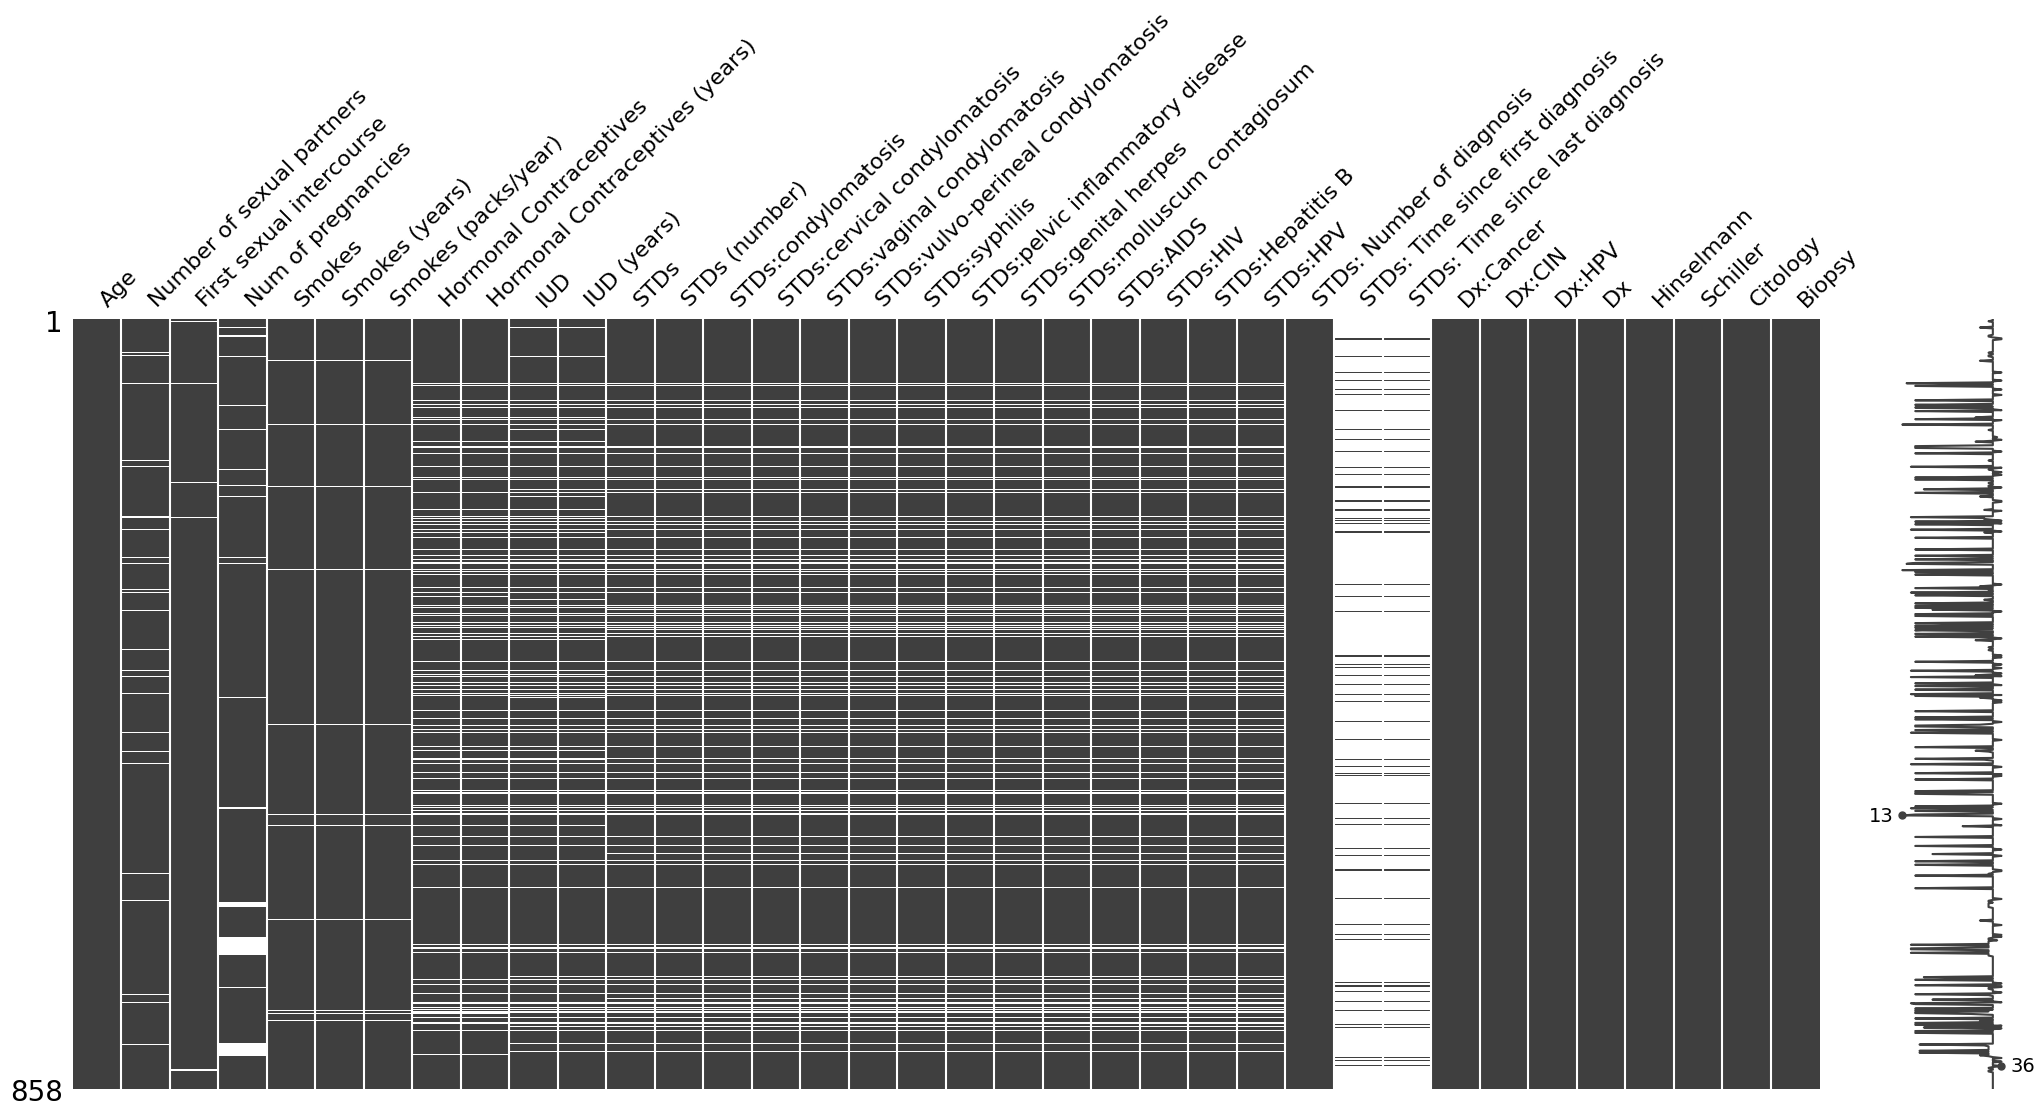

In [9]:
import missingno as msno
msno.matrix(df);

> ### We can see that 2 of the features named "STDs: Time since first diagnosis" and "STDs: Time since last diagnosis" have more than 90% of the values missing. So we can drop these columns.

> ### Two of the columns named STDs:cevical condylomatosis and STDs:AIDS has single type of value i.e 0.0, this means the result is negative for these tests. So we can drop these columns.

> ### And we are going to impute the remaining missing values with the median of column.

In [10]:
# We will impute the missing values with the mean of the column.

df.drop(["STDs: Time since first diagnosis", "STDs: Time since last diagnosis",'STDs:cervical condylomatosis','STDs:AIDS'], axis=1, inplace=True)
df = df.fillna(round(df.median()))

# Exploratory Data Analysis(EDA)

In [11]:
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.000,15.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0,0,0,0,0,0
1,15,1.000,14.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0,0,0,0,0,0
2,34,1.000,17.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0,0,0,0,0,0
3,52,5.000,16.000,4.000,1.000,37.000,37.000,1.000,3.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,1,0,1,0,0,0,0,0
4,46,3.000,21.000,4.000,0.000,0.000,0.000,1.000,15.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0,0,0,0,0,0


0    803
1     55
Name: Biopsy, dtype: int64


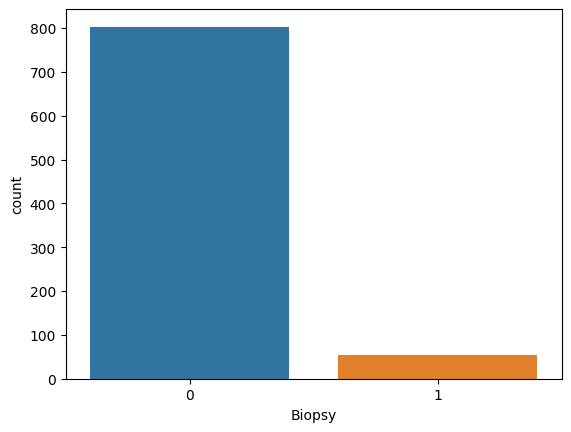

In [19]:
# Checking Biopsy column

print(df.Biopsy.value_counts())
sns.countplot(x="Biopsy", data=df);
plt.show()



> ## We can see that the data is imbalanced. We will use SMOTE to balance the data when we will go for model building.

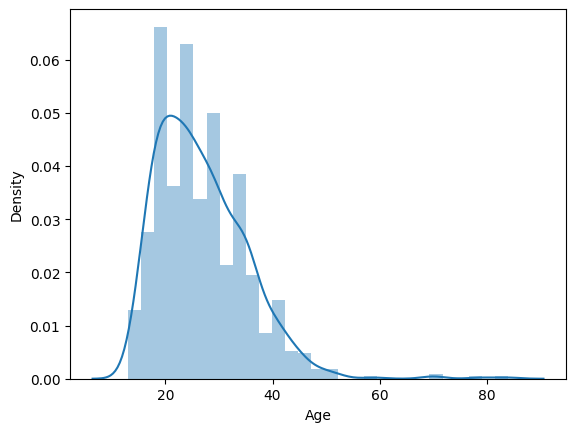

In [20]:
# Checking Age Distribution

sns.distplot(df["Age"]);

> ## We can see that the age is positively skewed.

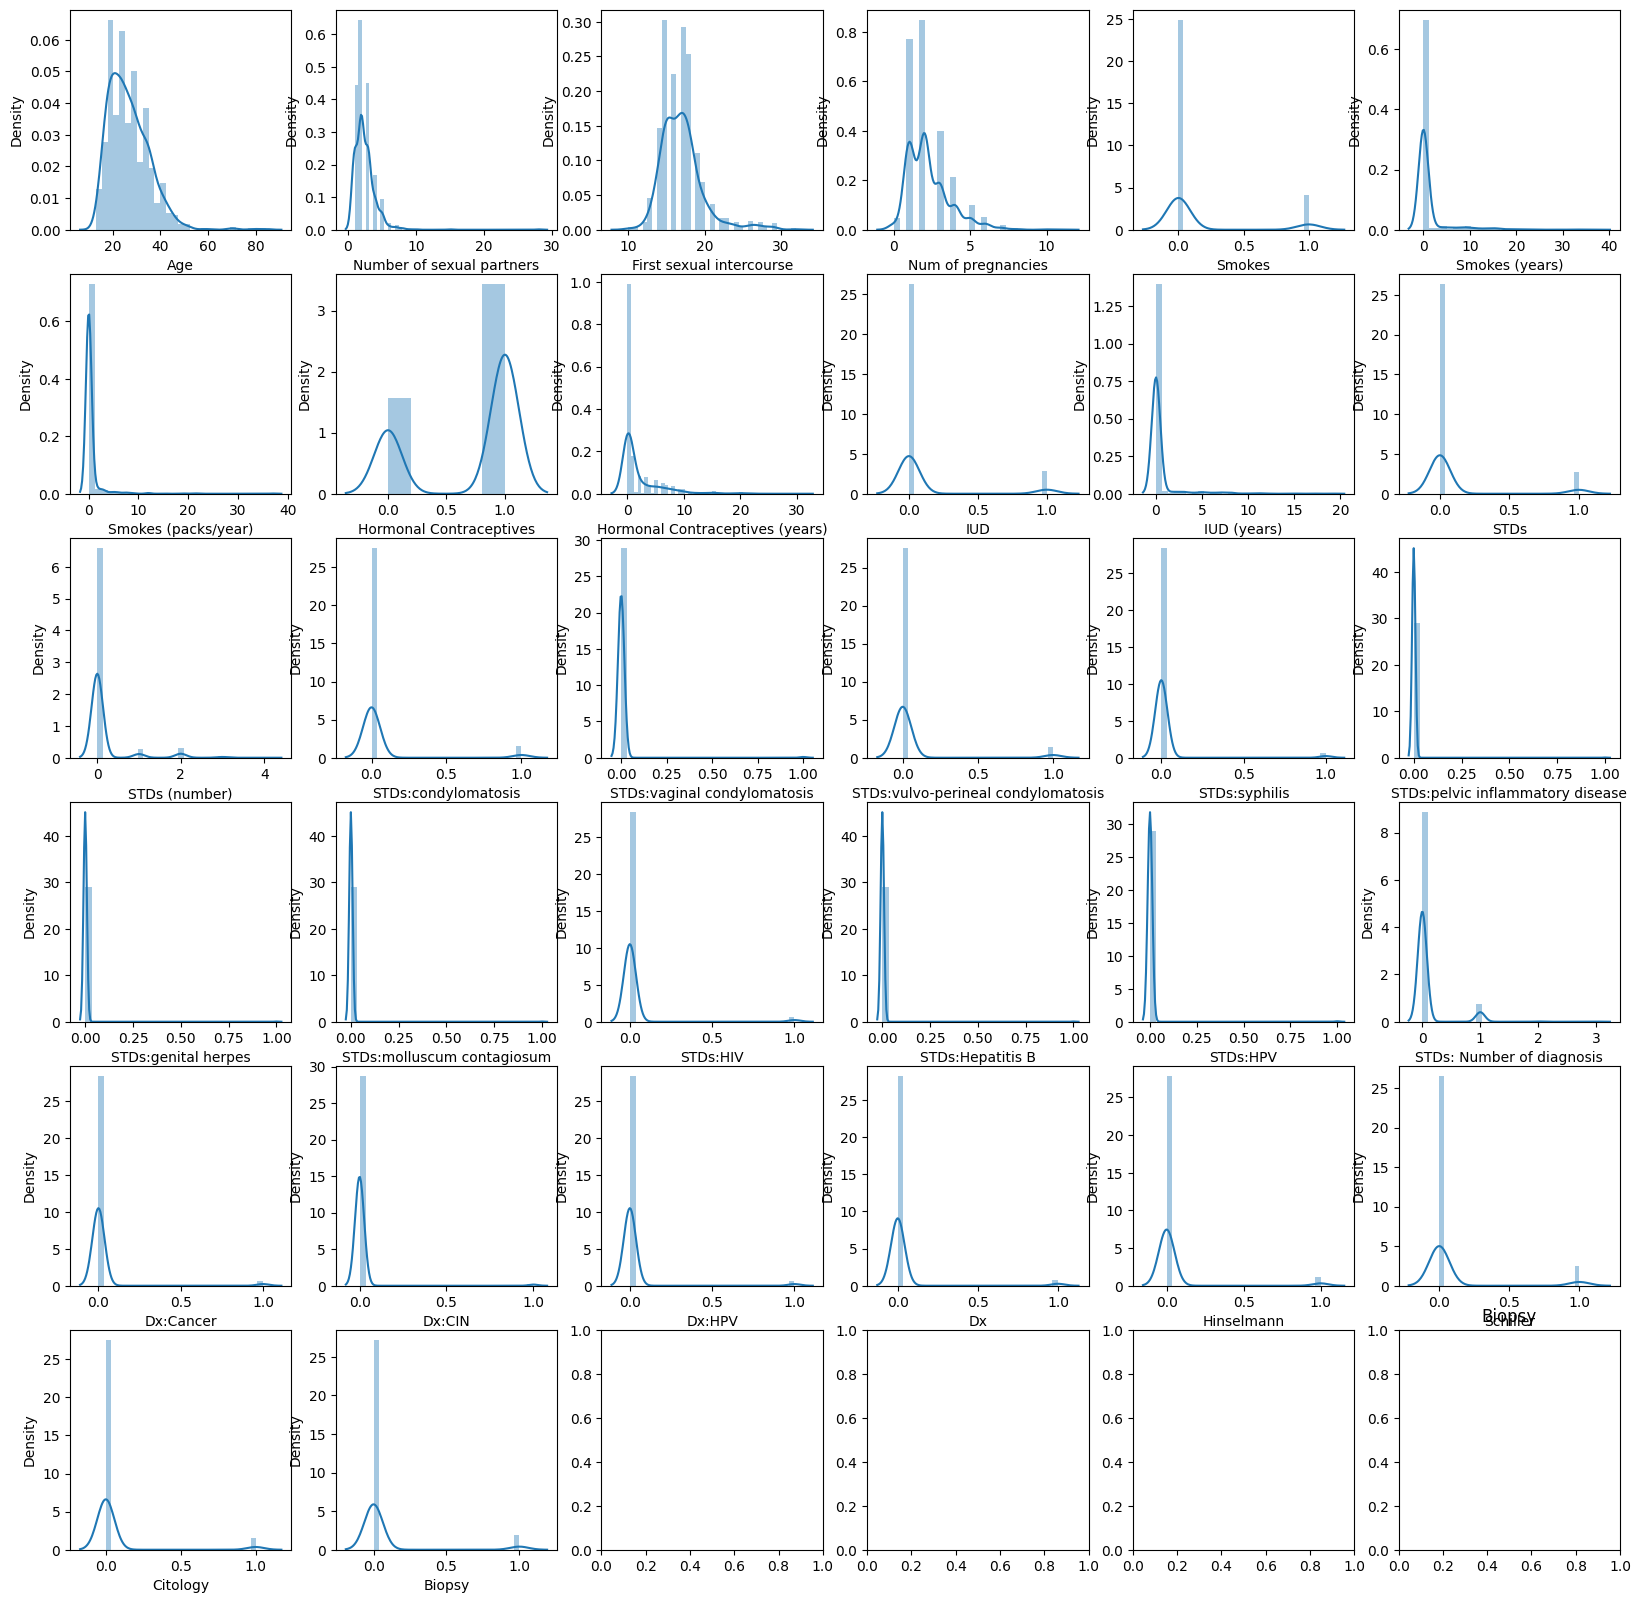

In [21]:
# Plotting the Distribution using subplots for 32 features

fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(20, 20))
for i, col in enumerate(df.columns):
    sns.distplot(df[col], ax=axes[i//6, i%6])
    plt.title(col)

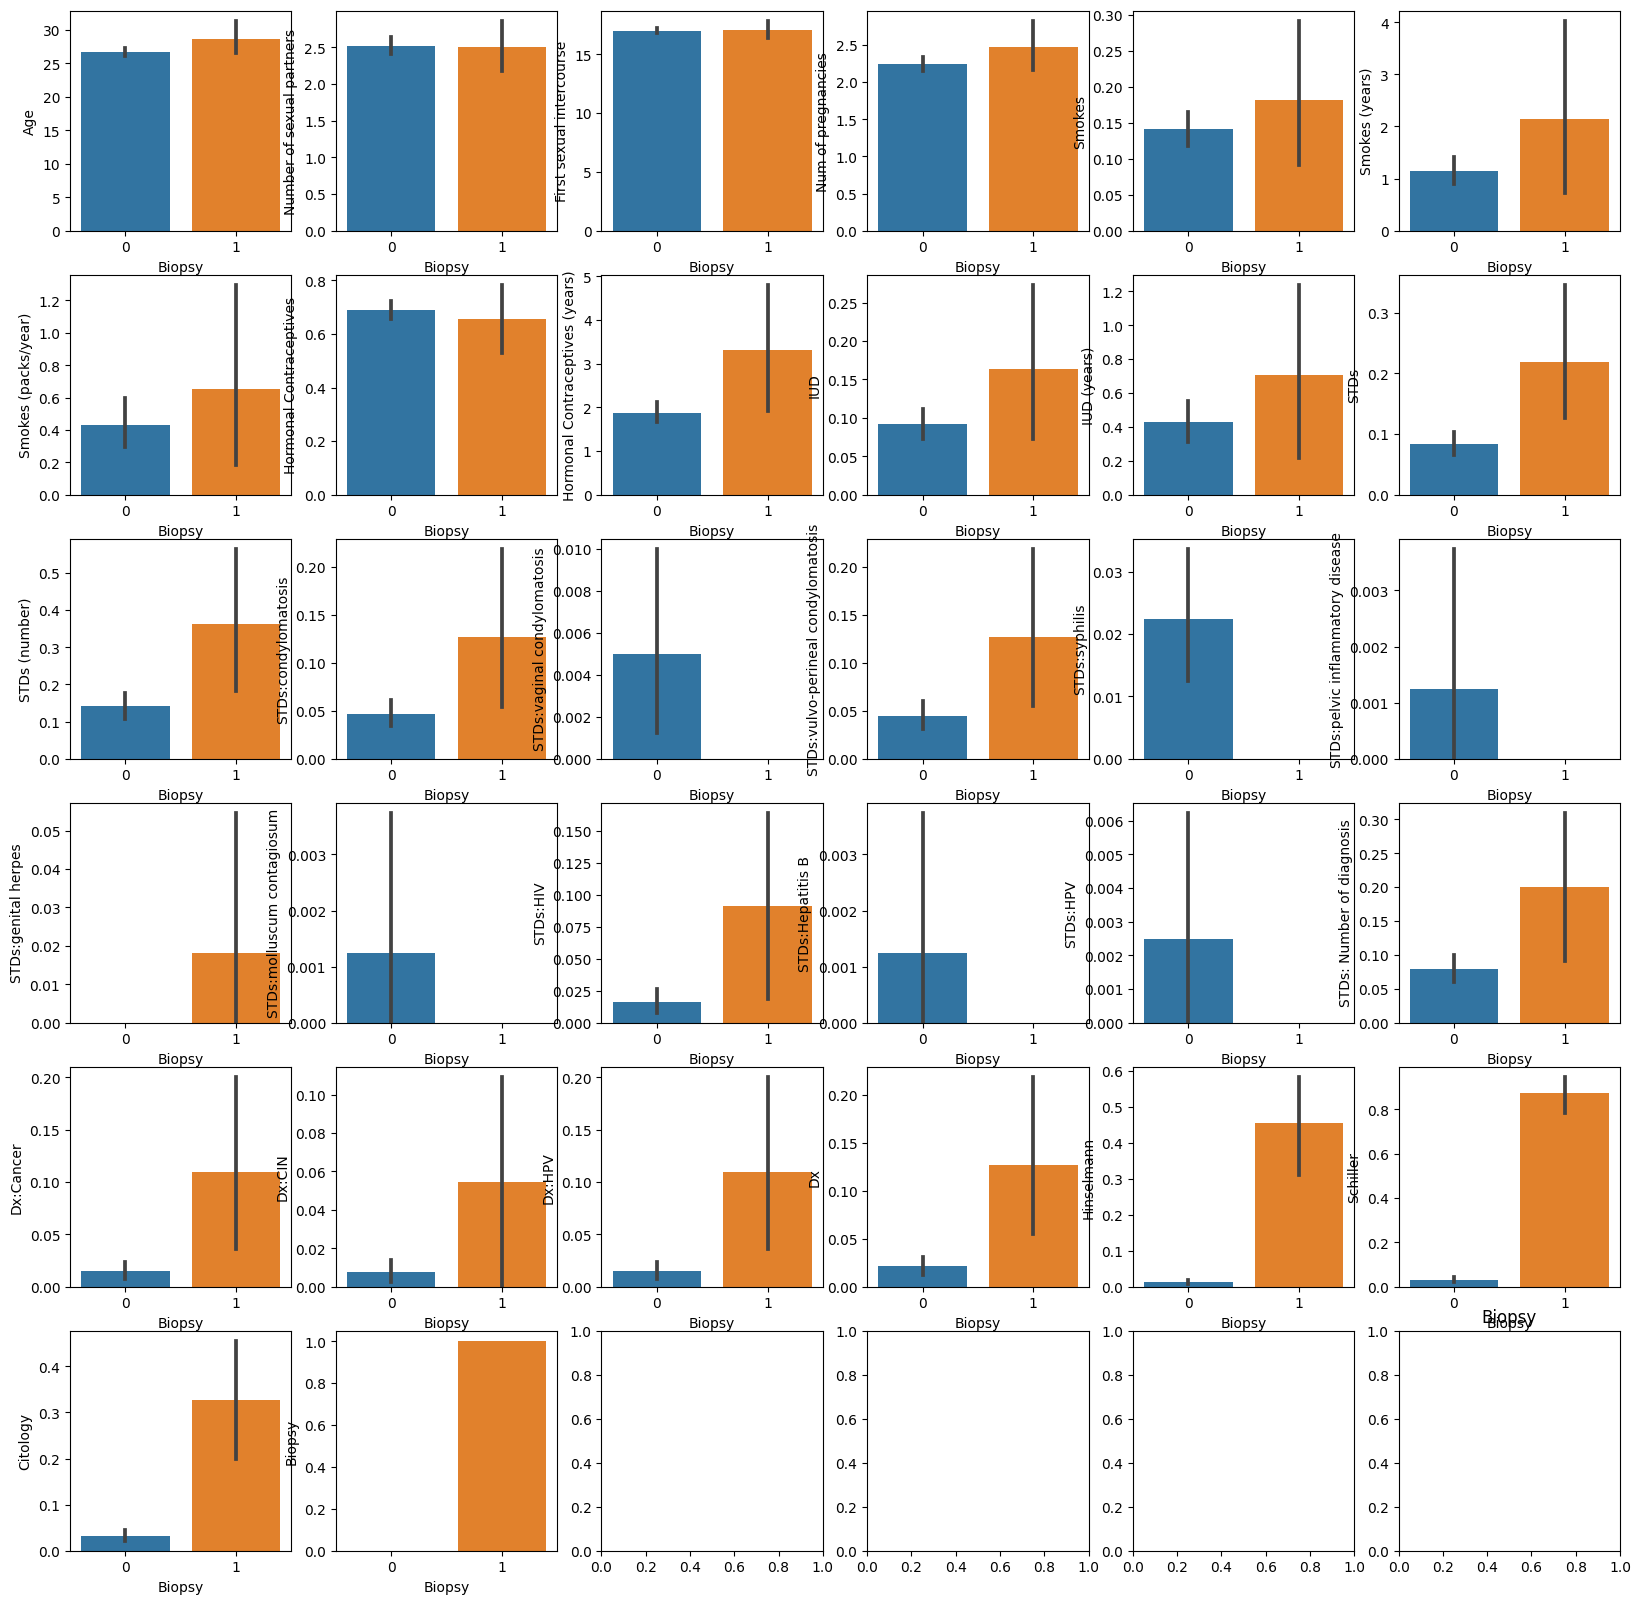

In [22]:
# Plottiing the barplot for 32 features

fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(20, 20))
for i, col in enumerate(df.columns):
    sns.barplot(x="Biopsy", y=col, data=df, ax=axes[i//6, i%6])
    plt.title(col)

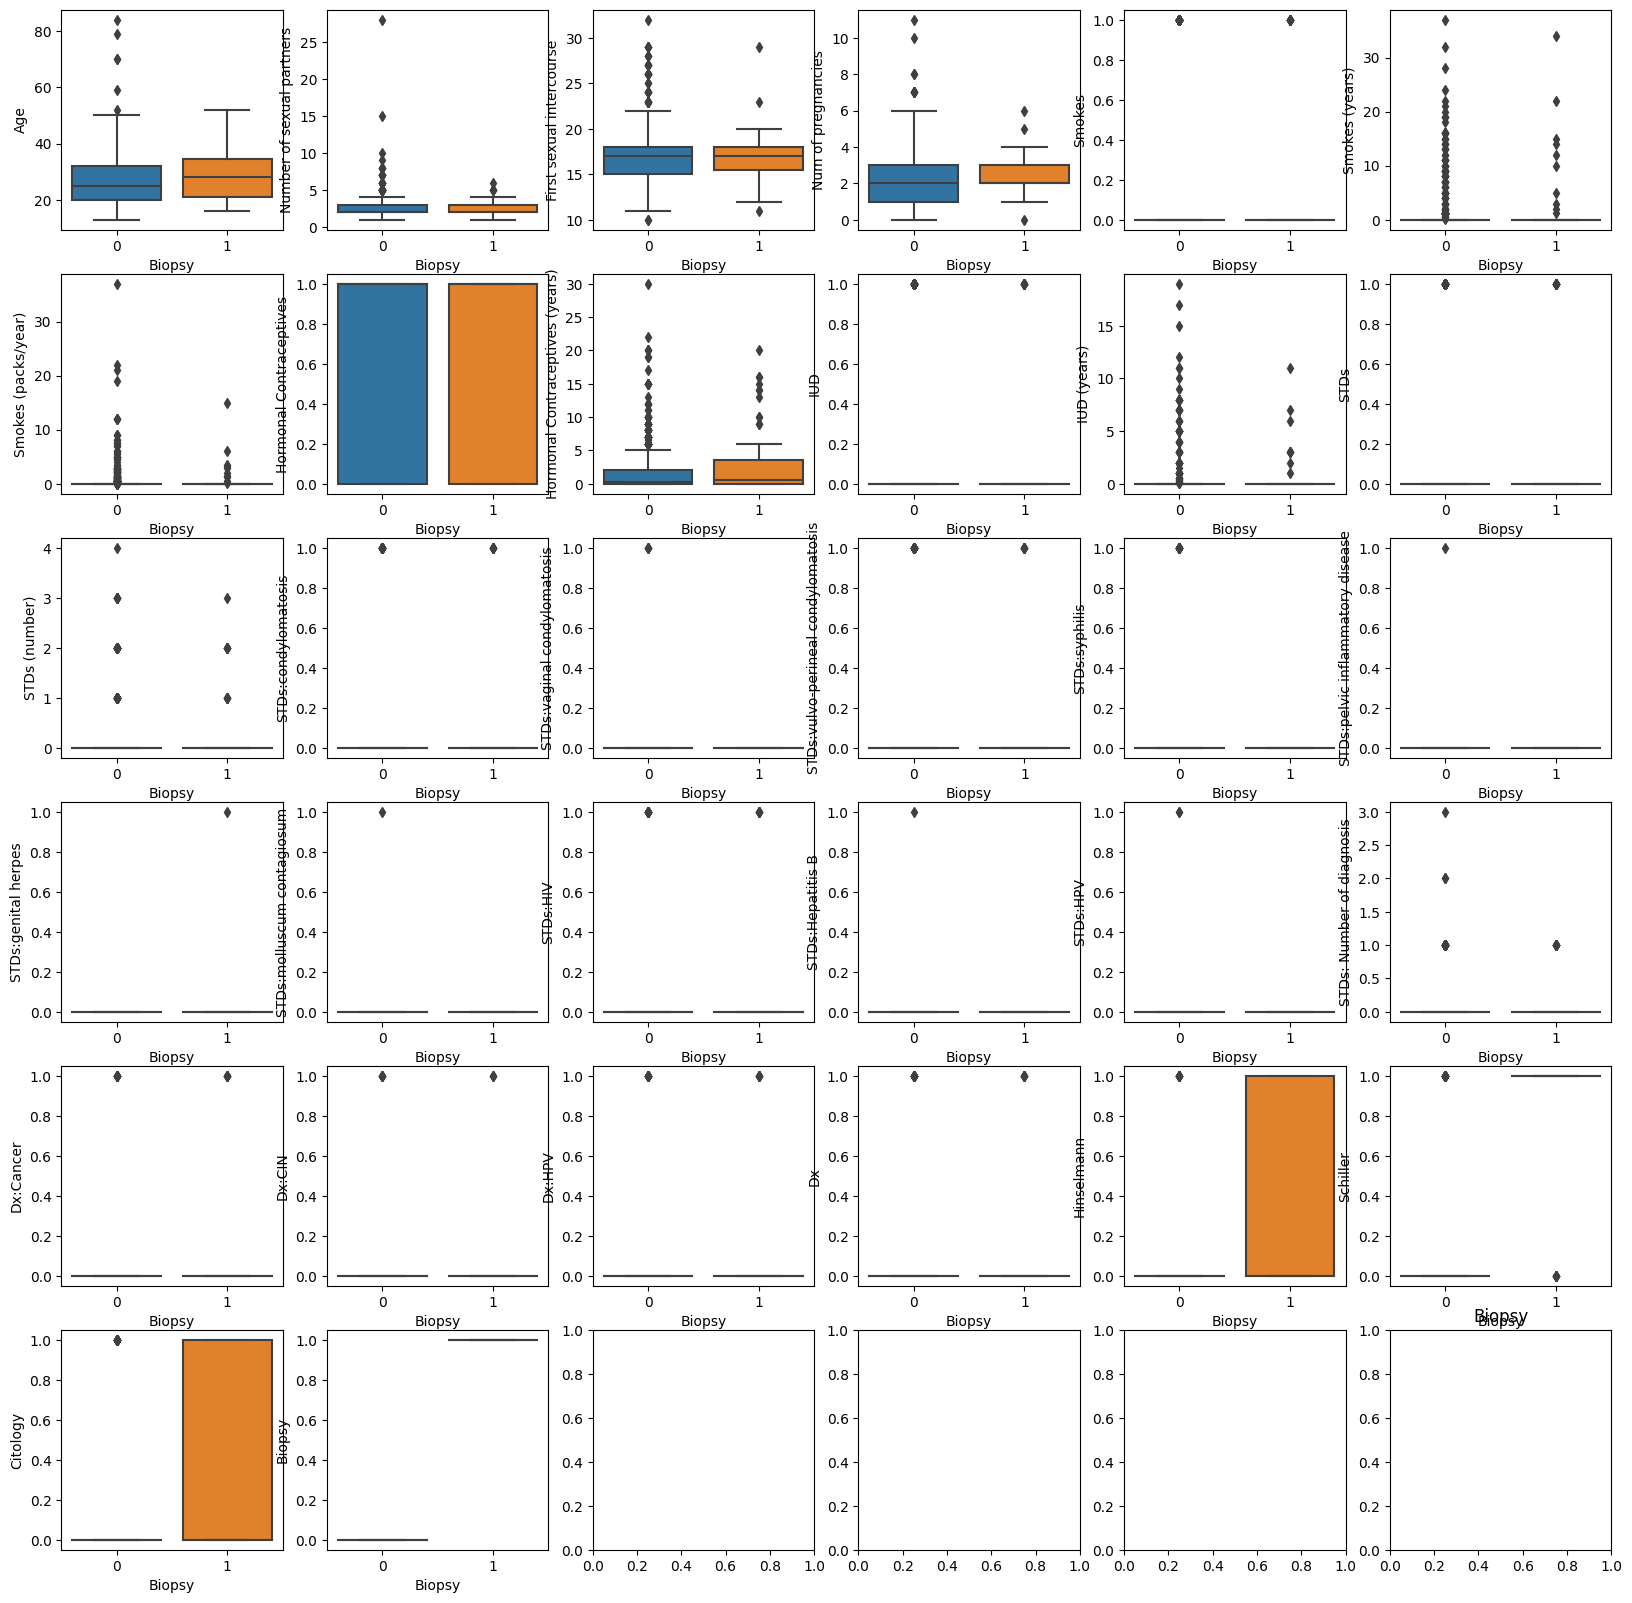

In [23]:
# Plotting the boxplot for 32 features

fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(20, 20))
for i, col in enumerate(df.columns):
    sns.boxplot(x="Biopsy", y=col, data=df, ax=axes[i//6, i%6])
    plt.title(col)

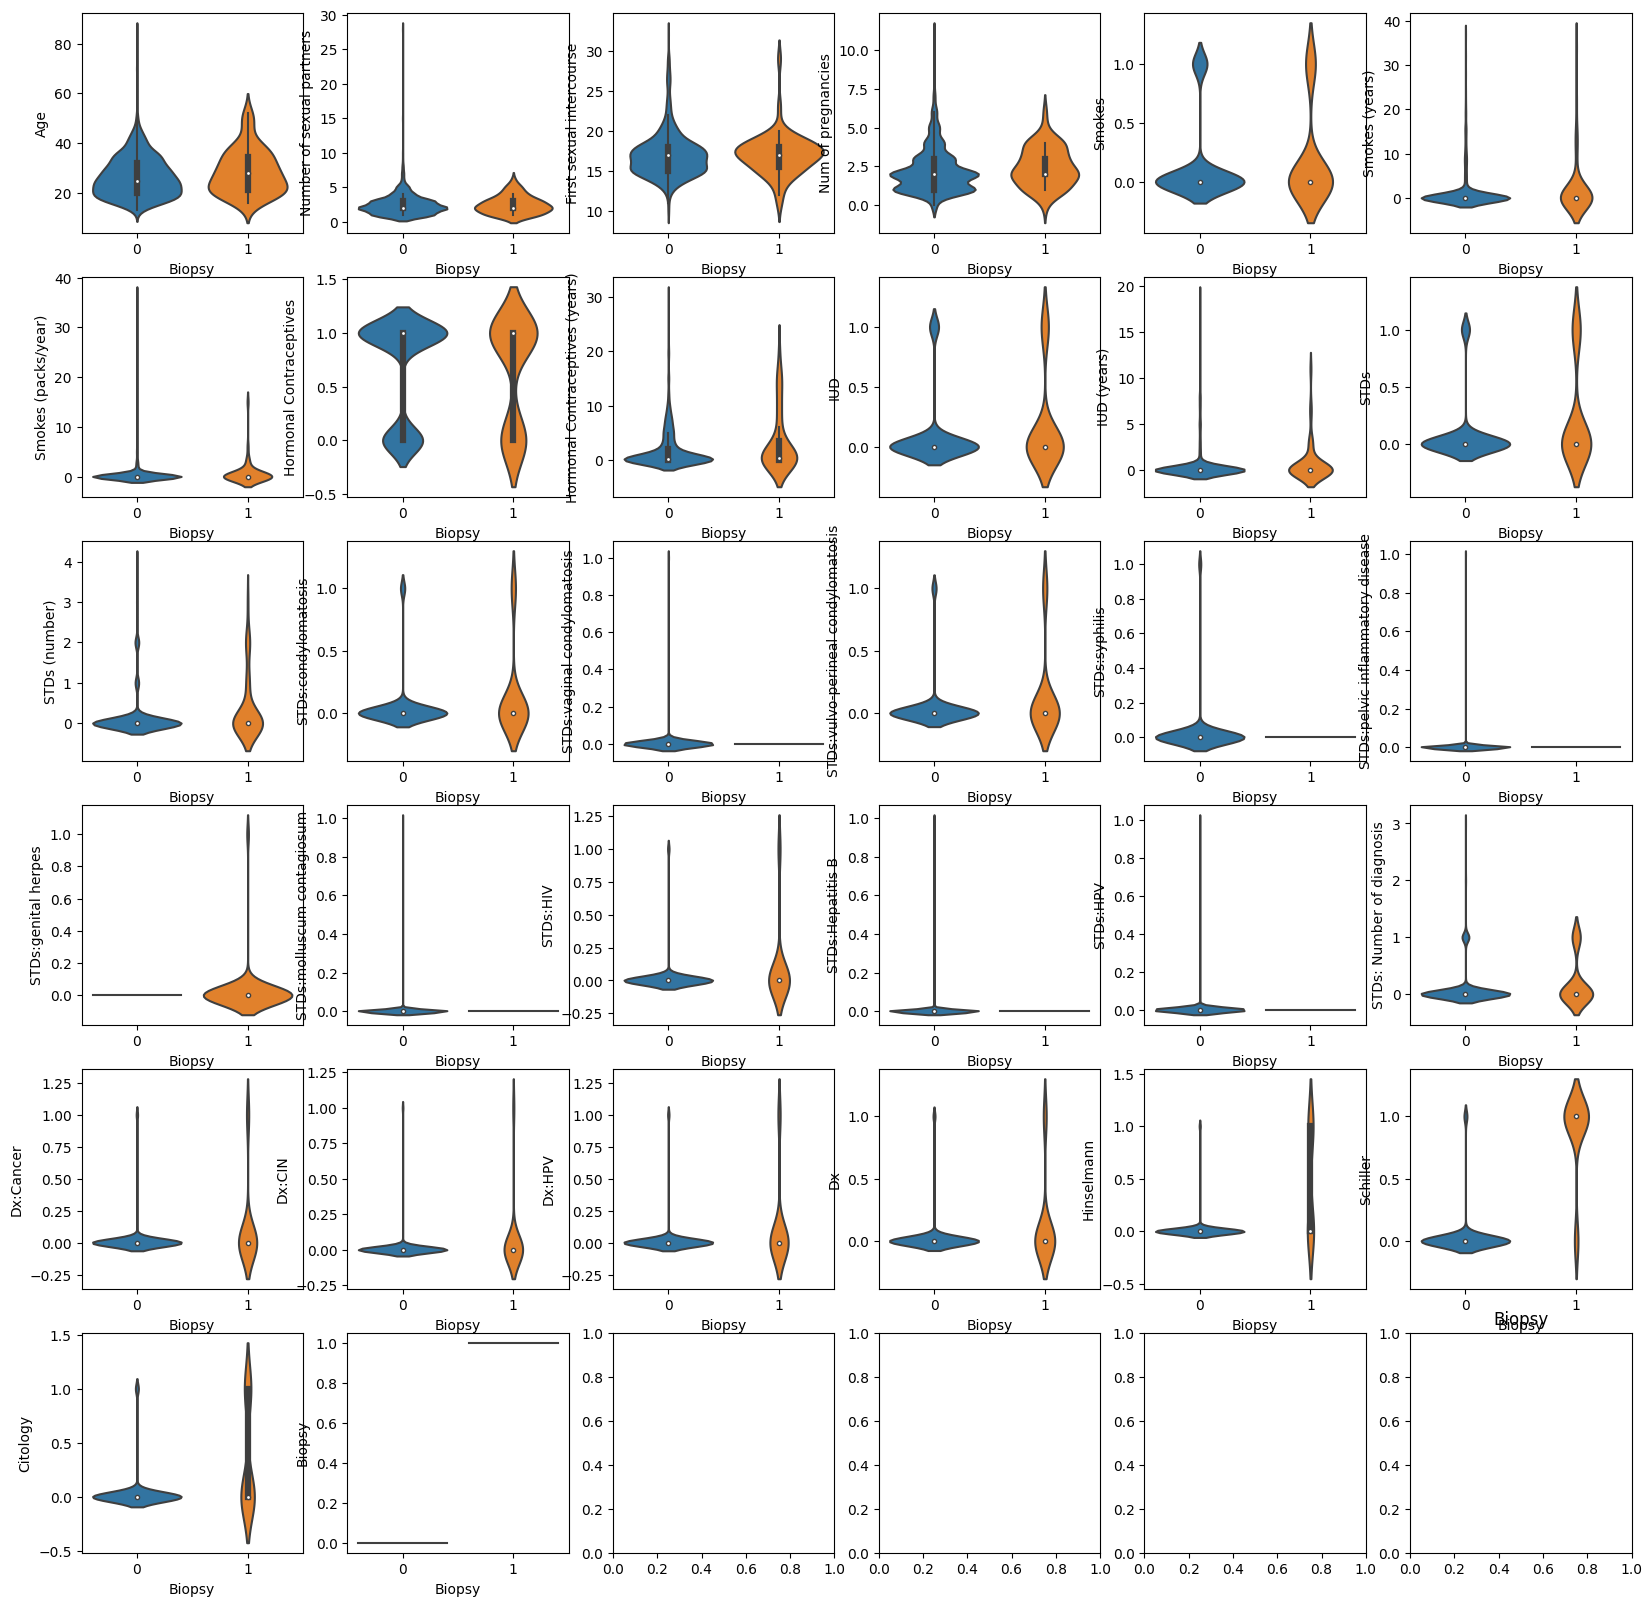

In [24]:
# Plotting the violinplot for 32 features

fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(20, 20))
for i, col in enumerate(df.columns):
    sns.violinplot(x="Biopsy", y=col, data=df, ax=axes[i//6, i%6])
    plt.title(col)
    

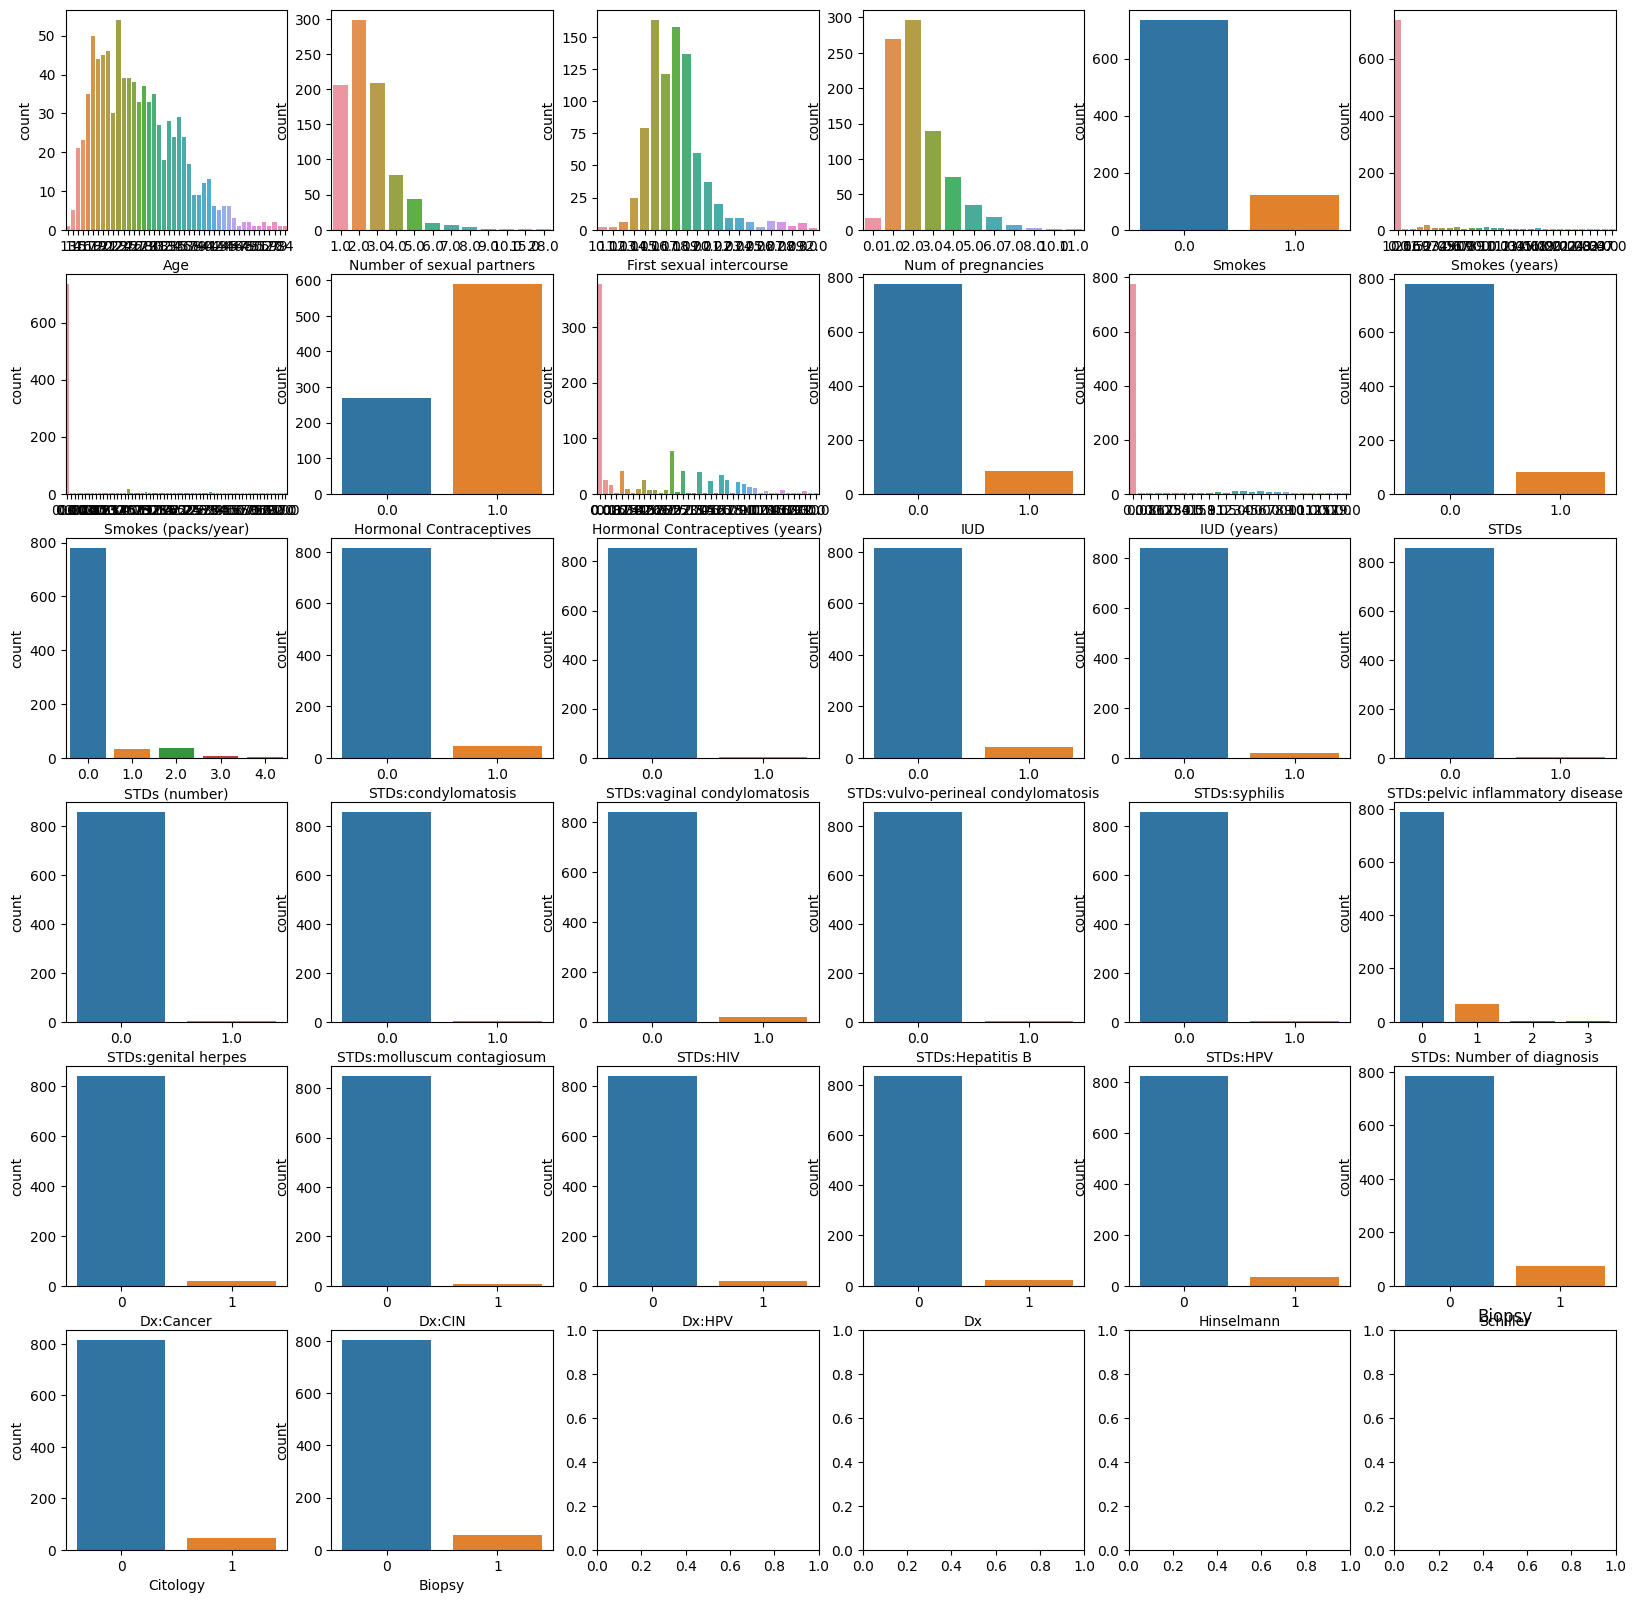

In [25]:
# Plotting the countplot for 32 features

fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(20, 20))
for i, col in enumerate(df.columns):
    sns.countplot(x=col, data=df, ax=axes[i//6, i%6])
    plt.title(col)

<Axes: >

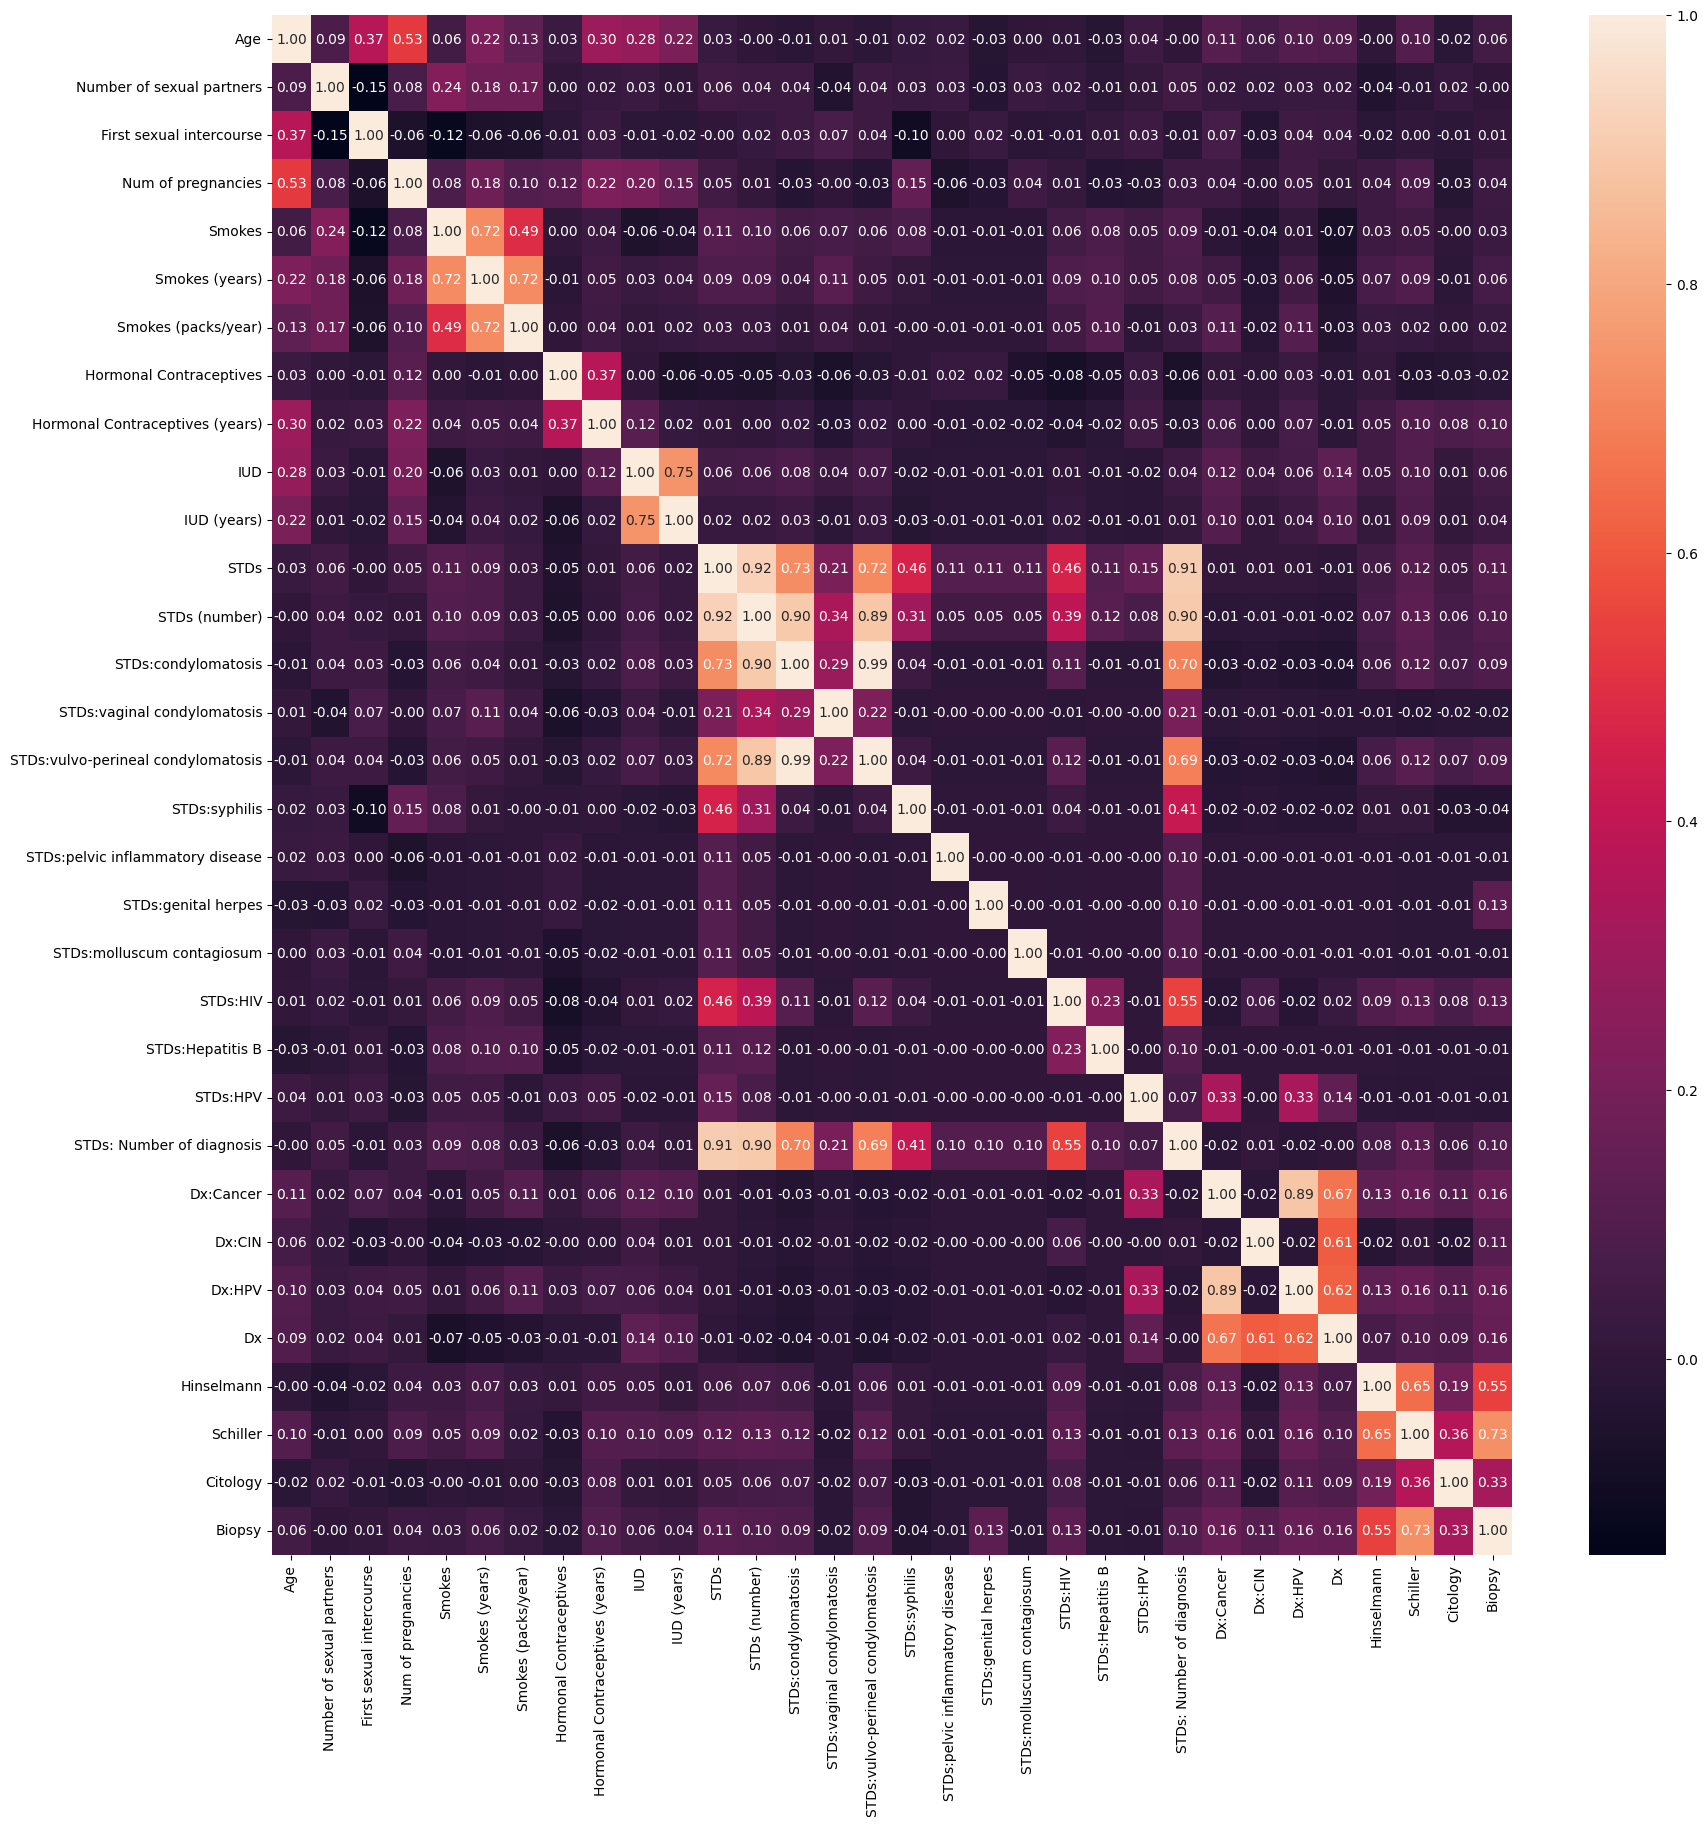

In [26]:
# Plotting the heatmap for the correlation

plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, fmt=".2f")

# Comparitive Study using Different Models

In [27]:
# Splitting the data into X and y
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
y.value_counts()

0    803
1     55
Name: Biopsy, dtype: int64

# Creating oversampled and undersampled data

In [31]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.combine import SMOTETomek

# create a SMOTE and NearMiss object
oversample = SMOTE()
undersample = NearMiss(version=1)
smote_tomek = SMOTETomek()


# fit and apply the oversampling to the data
X_oresampled, y_oresampled = oversample.fit_resample(X, y)
X_uresampled, y_uresampled = undersample.fit_resample(X, y)
X_smote_tomek, y_smote_tomek = smote_tomek.fit_resample(X, y)

# Checking the shape of the data

print("Original Data Shape: ", X.shape)
print("Oversampled Data Shape: ", X_oresampled.shape)
print("Undersampled Data Shape: ", X_uresampled.shape)
print("SMOTE Tomek Data Shape: ", X_smote_tomek.shape)

Original Data Shape:  (858, 31)
Oversampled Data Shape:  (1606, 31)
Undersampled Data Shape:  (110, 31)
SMOTE Tomek Data Shape:  (1596, 31)


### Splitting the data into train and test of each oversampling and undersampling and only stratify the original data because it is the most imbalanced data in the different datasets.


In [32]:
# Splitting the data into train and test

from sklearn.model_selection import train_test_split

# Splitting the Original data into train and test

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=101, stratify=y
)

# Splitting the Oversampled data into train and test

X1_train, X1_test, y1_train, y1_test = train_test_split(
    X_oresampled, y_oresampled, test_size=0.3, random_state=101
)

# Splitting the Undersampled data into train and test

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X_uresampled, y_uresampled, test_size=0.3, random_state=101
)

# Splitting the SMOTE Tomek data into train and test

X3_train, X3_test, y3_train, y3_test = train_test_split(
    X_smote_tomek, y_smote_tomek, test_size=0.3, random_state=101
)


In [34]:
# Importing the models

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from catboost import CatBoostClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    RandomForestClassifier,
    GradientBoostingClassifier
)

# Importing the metrics

from sklearn.metrics import (
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
    accuracy_score,
    roc_auc_score,
)


In [35]:
# Creating a list of models
models = [
    ("Logistic Regression", LogisticRegression()),
    ("XGBoost", XGBClassifier(verbosity=0)),
    ("SVM", SVC()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Naive Bayes", BernoulliNB()),
    ("AdaBoost", AdaBoostClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("Gradient Boosting", GradientBoostingClassifier()),
    ("CatBoost", CatBoostClassifier(verbose=0)),
    ("KNN", KNeighborsClassifier())
]


In [42]:
# Creating a function to fit and evaluate the models
def fit_and_evaluate(models, X_train, X_test, y_train, y_test):
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models:
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = {
            'Training Set Accuracy': model.score(X_train, y_train),
            "Test Set Accuracy": model.score(X_test, y_test),
            "F1 Score": f1_score(y_test, model.predict(X_test)),
            "Precision": precision_score(y_test, model.predict(X_test)),
            "Recall": recall_score(y_test, model.predict(X_test)),
            "ROC AUC Score": roc_auc_score(y_test, model.predict(X_test)),
        }
    # Return model scores as a dataframe
    model_df = pd.DataFrame(model_scores).T.sort_values(by='Recall', ascending=False)
    return model_df


In [43]:
# Calling the function with different datasets
# Fitting with original dataset
model_scores = fit_and_evaluate(models, X_train, X_test, y_train, y_test)
# Fitting with oversampled dataset
model_scores1 = fit_and_evaluate(models, X1_train, X1_test, y1_train, y1_test)
# Fitting with undersampled dataset
model_scores2 = fit_and_evaluate(models, X2_train, X2_test, y2_train, y2_test)
# Fitting with SMOTE Tomek dataset
model_scores3 = fit_and_evaluate(models, X3_train, X3_test, y3_train, y3_test)


> # Comparitive analysis of the models

> ### Model scores of the original dataset


In [44]:
model_scores

,Training Set Accuracy,Test Set Accuracy,F1 Score,Precision,Recall,ROC AUC Score
Naive Bayes,0.955,0.957,0.686,0.667,0.706,0.840
Gradient Boosting,0.997,0.969,0.750,0.800,0.706,0.847
CatBoost,0.997,0.965,0.727,0.750,0.706,0.845
XGBoost,1.000,0.953,0.600,0.692,0.529,0.756
Logistic Regression,0.965,0.950,0.552,0.667,0.471,0.727
Decision Tree,1.000,0.961,0.615,0.889,0.471,0.733
AdaBoost,0.985,0.950,0.552,0.667,0.471,0.727
Random Forest,1.000,0.953,0.571,0.727,0.471,0.729
SVM,0.937,0.934,0.000,0.000,0.000,0.500
KNN,0.942,0.934,0.000,0.000,0.000,0.500


> ### We can see that Naive Bayes, Random Forest, Logistic Regression and Descision Tree are performing well on the original dataset 

> ### Model scores of the oversampled dataset

In [45]:
model_scores1

,Training Set Accuracy,Test Set Accuracy,F1 Score,Precision,Recall,ROC AUC Score
XGBoost,1.000,0.975,0.975,0.964,0.988,0.975
Decision Tree,1.000,0.969,0.969,0.952,0.988,0.969
Random Forest,1.000,0.965,0.965,0.959,0.971,0.965
Gradient Boosting,0.993,0.967,0.967,0.967,0.967,0.967
CatBoost,0.999,0.961,0.961,0.959,0.963,0.961
KNN,0.921,0.869,0.880,0.813,0.959,0.869
AdaBoost,0.973,0.950,0.950,0.958,0.942,0.950
Logistic Regression,0.892,0.892,0.884,0.957,0.822,0.892
Naive Bayes,0.851,0.861,0.855,0.892,0.822,0.861
SVM,0.642,0.645,0.518,0.807,0.382,0.645


> ### We can see that Desicion Tree, Random Forest, Logistic Regression & KNN are performing well on the oversampled dataset

> ### Model scores of the undersampled dataset

In [46]:
model_scores2

,Training Set Accuracy,Test Set Accuracy,F1 Score,Precision,Recall,ROC AUC Score
Logistic Regression,0.961,0.848,0.815,0.846,0.786,0.840
Decision Tree,1.000,0.758,0.733,0.688,0.786,0.761
Random Forest,1.000,0.848,0.815,0.846,0.786,0.840
Gradient Boosting,1.000,0.909,0.880,1.000,0.786,0.893
CatBoost,1.000,0.848,0.815,0.846,0.786,0.840
XGBoost,0.987,0.848,0.800,0.909,0.714,0.831
Naive Bayes,0.922,0.879,0.833,1.000,0.714,0.857
AdaBoost,1.000,0.758,0.714,0.714,0.714,0.752
SVM,0.870,0.697,0.545,0.750,0.429,0.662
KNN,0.870,0.697,0.545,0.750,0.429,0.662


> ### We can see that Desicion Tree, Naive bayes, Random Forest, Logistic Regression are performing well on the undersampled dataset

> ### Model scores of the SMOETomek dataset

In [47]:
model_scores3

,Training Set Accuracy,Test Set Accuracy,F1 Score,Precision,Recall,ROC AUC Score
Gradient Boosting,0.992,0.987,0.987,0.987,0.987,0.987
XGBoost,1.000,0.985,0.985,0.987,0.983,0.985
Random Forest,1.000,0.983,0.983,0.987,0.979,0.983
CatBoost,0.996,0.975,0.974,0.979,0.970,0.975
Decision Tree,1.000,0.962,0.962,0.966,0.958,0.962
KNN,0.924,0.864,0.874,0.804,0.958,0.866
AdaBoost,0.967,0.965,0.964,0.974,0.953,0.964
Naive Bayes,0.835,0.835,0.821,0.883,0.767,0.834
Logistic Regression,0.869,0.871,0.853,0.968,0.763,0.869
SVM,0.767,0.720,0.660,0.823,0.551,0.718


> ### We can see that Desicion Tree, Naive bayes, Random Forest, KNN are performing well on the SMOTEtomek dataset

> ## After doing the comparitive analysis of the models we can see that the Decision Tree model is performing well on all the datasets.

> ## So we will use Decision Tree model for our final model.

In [51]:
# Applying Sequential Feature Selection both forward and backward

from sklearn.feature_selection import SequentialFeatureSelector

# Creating a function to apply Sequential Feature Selection

def sfs(model, X_train, y_train, X_test, y_test,direction='forward'):
    sfs = SequentialFeatureSelector(model, n_features_to_select=15, direction=direction, scoring='roc_auc', cv=5,n_jobs=-1)
    sfs.fit(X_train, y_train)
    print("Selected Features: ", X_train.columns[sfs.get_support()])
    print("Model Score: ", model.score(X_test, y_test))
    print("F1 Score: ", f1_score(y_test, model.predict(X_test)))
    print("Precision: ", precision_score(y_test, model.predict(X_test)))
    print("Recall: ", recall_score(y_test, model.predict(X_test)))
    print("ROC AUC Score: ", roc_auc_score(y_test, model.predict(X_test)))
    print("Confusion Matrix: ", confusion_matrix(y_test, model.predict(X_test)))
    print(" ")
    pass

# Applying Sequential Feature Selection on the original dataset on decision tree

for i in models:
    if i[0] == 'Decision Tree':
        print(i[0])
        sfs(i[1], X_train, y_train, X_test, y_test, direction='forward')
        sfs(i[1], X_train, y_train, X_test, y_test, direction='backward')
        print(" ")


Decision Tree
Selected Features:  Index(['Smokes', 'STDs:vaginal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:Hepatitis B', 'STDs:HPV',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology'],
      dtype='object')
Model Score:  0.9922480620155039
F1 Score:  0.9411764705882353
Precision:  0.9411764705882353
Recall:  0.9411764705882353
ROC AUC Score:  0.9685135464974371
Confusion Matrix:  [[240   1]
 [  1  16]]
 
Selected Features:  Index(['Age', 'First sexual intercourse', 'Smokes',
       'Hormonal Contraceptives (years)', 'IUD (years)',
       'STDs:vaginal condylomatosis', 'STDs:syphilis', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:Hepatitis B',
       'STDs: Number of diagnosis', 'Dx:HPV', 'Dx', 'Schiller', 'Citology'],
      dtype='object')
Model Score:  0.9922480620155039
F1 Score:  0.9411764705882353
Precision:  0.94117647058

In [69]:
# Making Descision Tree model with oversampled data using GridSearchCV

from sklearn.model_selection import GridSearchCV

# Creating a parameter grid
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 5, 10, 15, 20],
    "min_samples_split": [2, 4, 6],
    "min_samples_leaf": [1, 2, 4],
}

# Instantiate GridSearchCV

grid_search = GridSearchCV(
    DecisionTreeClassifier(), param_grid, cv=10, verbose=2, n_jobs=-1
)

# Fit the model to the data
grid_search.fit(X_train, y_train)

# Checking the best parameters
params = grid_search.best_params_
print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)

# Creating a model with best parameters

model = DecisionTreeClassifier(**params)

# Fitting the model to the data
model.fit(X1_train, y1_train)

# Evaluating the model

print("Training Set Accuracy: ", model.score(X1_train, y1_train))
print("Test Set Accuracy: ", model.score(X1_test, y1_test))
print("F1 Score: ", f1_score(y1_test, model.predict(X1_test)))
print("Precision: ", precision_score(y1_test, model.predict(X1_test)))
print("Recall: ", recall_score(y1_test, model.predict(X1_test)))
print("ROC AUC Score: ", roc_auc_score(y1_test, model.predict(X1_test)))

Fitting 10 folds for each of 90 candidates, totalling 900 fits
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.9724162452591656
DecisionTreeClassifier(criterion='entropy', max_depth=10)
Training Set Accuracy:  0.9973309608540926
Test Set Accuracy:  0.9564315352697096
F1 Score:  0.9572301425661914
Precision:  0.94
Recall:  0.975103734439834
ROC AUC Score:  0.9564315352697096


<Axes: >

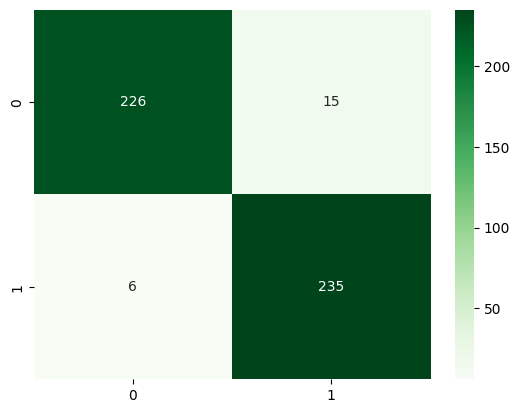

In [70]:
# Plotting the confusion matrix

cm = confusion_matrix(y1_test, model.predict(X1_test))
sns.heatmap(cm, annot=True, fmt="d", cmap=plt.cm.Greens)

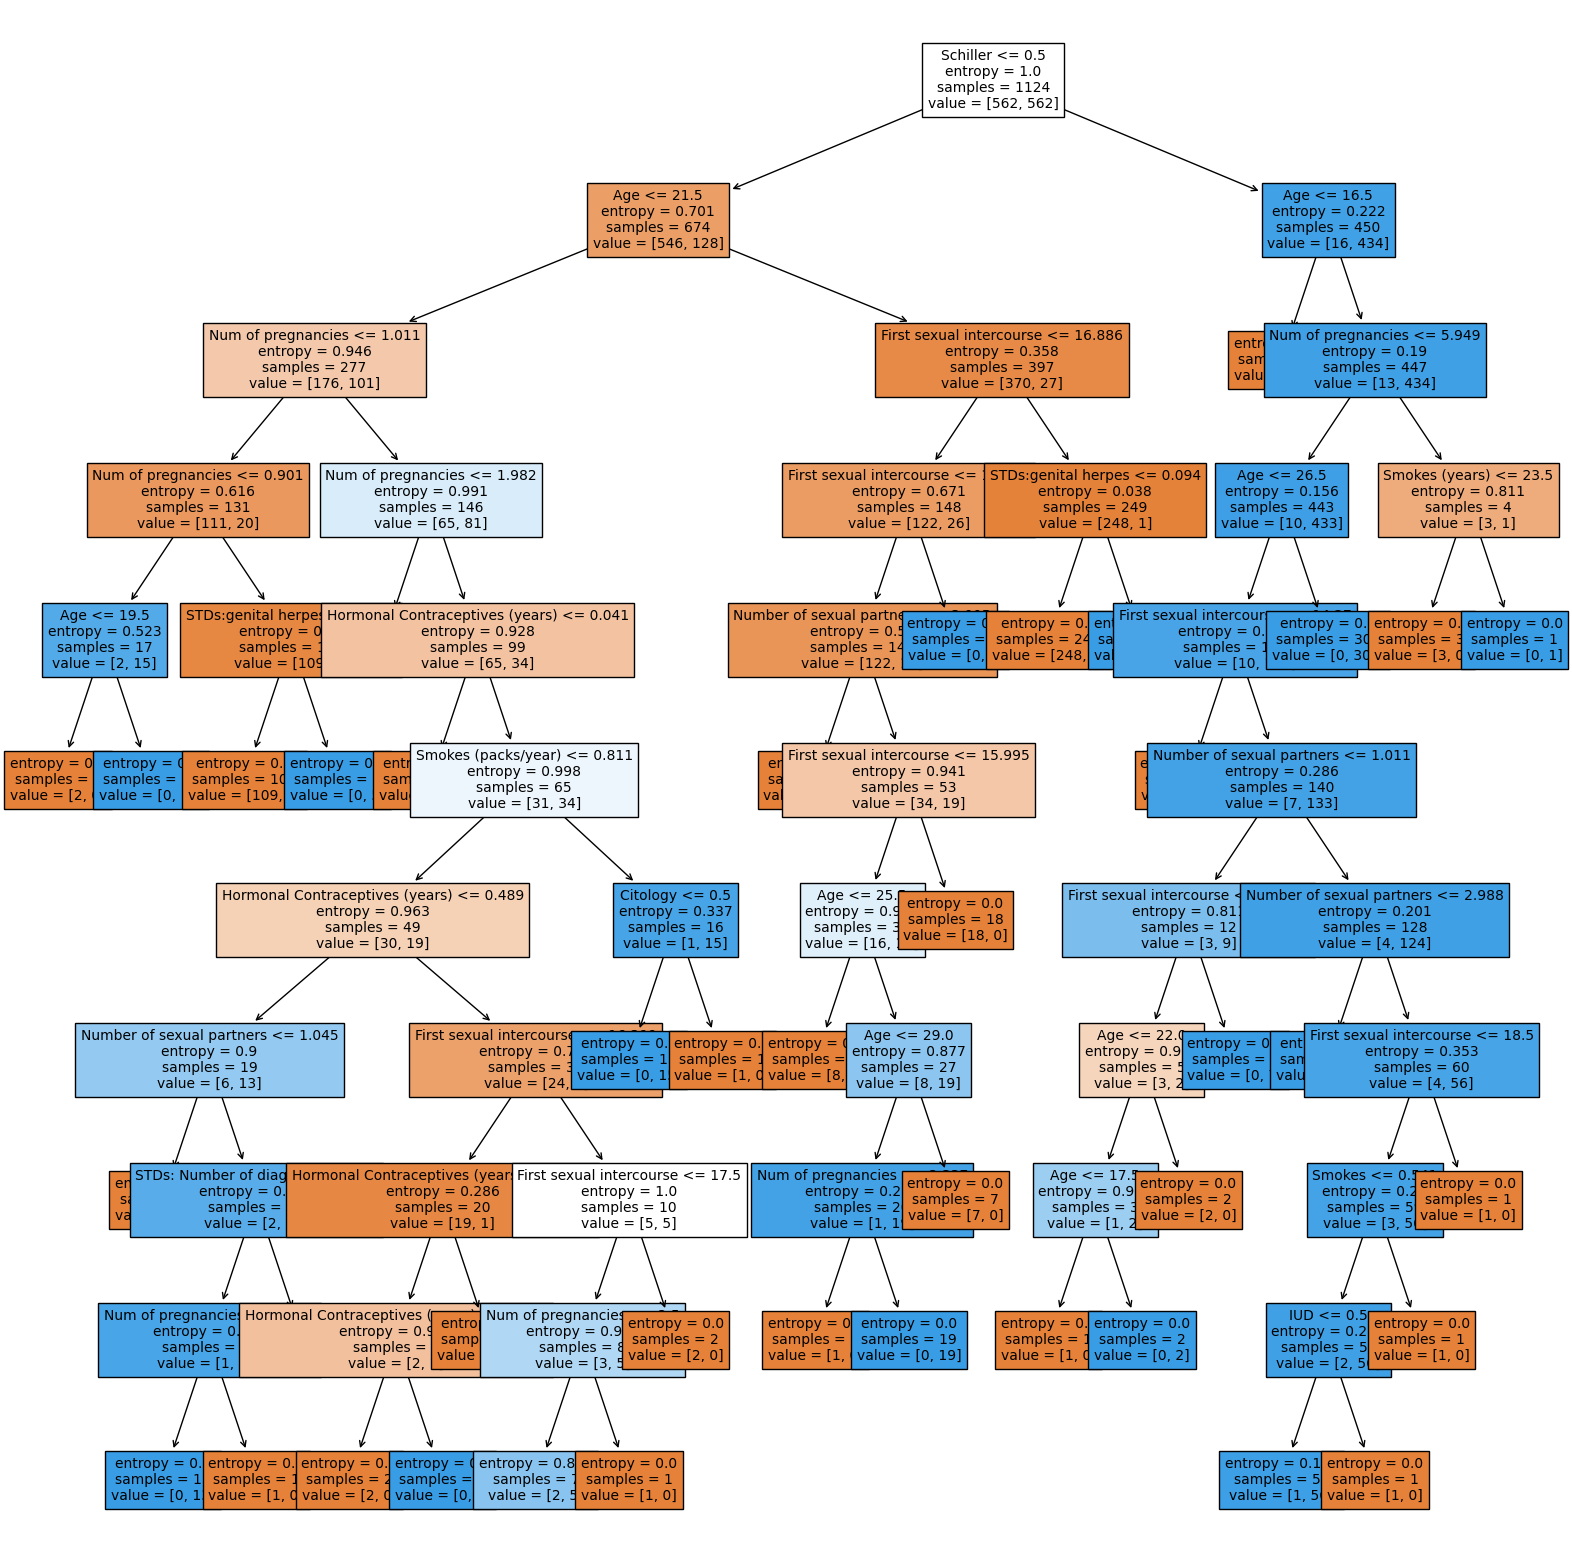

In [71]:
# Plotting the tree for better understanding

from sklearn import tree

plt.figure(figsize=(20, 20))
tree.plot_tree(model, filled=True, fontsize=10, feature_names=X1_train.columns)
plt.show()

# Deep Learning(Artifitial Neuron Networks`)

In [48]:
# Splitting the Train data into train and validation set for ANN

X_train, X_val, y_train, y_val = train_test_split(
    X1_train, y1_train, test_size=0.2, random_state=101, stratify=y1_train)

In [51]:
# Importing Deep Learning Libraries
import tensorflow as tf

In [52]:
# Initializing the ANN
ann = tf.keras.models.Sequential()

In [53]:
# Input Layer
ann.add(tf.keras.layers.Dense(units=34, activation="relu"))
# Second  Hidden Layer
ann.add(tf.keras.layers.Dense(units=68, activation="relu"))
# Third  Hidden Layer
ann.add(tf.keras.layers.Dense(units=136, activation="relu"))
# Fourth  Hidden Layer
ann.add(tf.keras.layers.Dense(units=272, activation="relu"))
# Fifth  Hidden Layer
ann.add(tf.keras.layers.Dense(units=136, activation="relu"))
# Sixth  Hidden Layer
ann.add(tf.keras.layers.Dense(units=68, activation="relu"))
# Seventh  Hidden Layer
ann.add(tf.keras.layers.Dense(units=34, activation="relu"))
# Output Layer
ann.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [54]:
# Compiling the ANN
ann.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [55]:
# Fitting the ANN to Original Dataset

ann.fit(X_train, y_train, batch_size=32, epochs=100,verbose=0,validation_data=(X_val, y_val))

In [56]:
ypredann = ann.predict(X1_test) > 0.5

16/16 [==============================] - 0s 812us/step


In [59]:
# Importing the metrics
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
)

print("Classification Report:\n", classification_report(y1_test, ypredann))
print("Confusion Matrix:\n", confusion_matrix(y1_test, ypredann))
print("Accuracy of Model:\n", accuracy_score(y1_test, ypredann))
print("F1 Score of Model:\n", f1_score(y1_test, ypredann))
print("Precision of Model:\n", precision_score(y1_test, ypredann))
print("Recall of Model:\n", recall_score(y1_test, ypredann))
print("ROC AUC Score of Model:\n", roc_auc_score(y1_test, ypredann))


Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       241
           1       0.94      0.92      0.93       241

    accuracy                           0.93       482
   macro avg       0.93      0.93      0.93       482
weighted avg       0.93      0.93      0.93       482

Confusion Matrix:
 [[226  15]
 [ 20 221]]
Accuracy of Model:
 0.9273858921161826
F1 Score of Model:
 0.9266247379454926
Precision of Model:
 0.9364406779661016
Recall of Model:
 0.91701244813278
ROC AUC Score of Model:
 0.9273858921161825


Text(50.722222222222214, 0.5, 'Predicted')

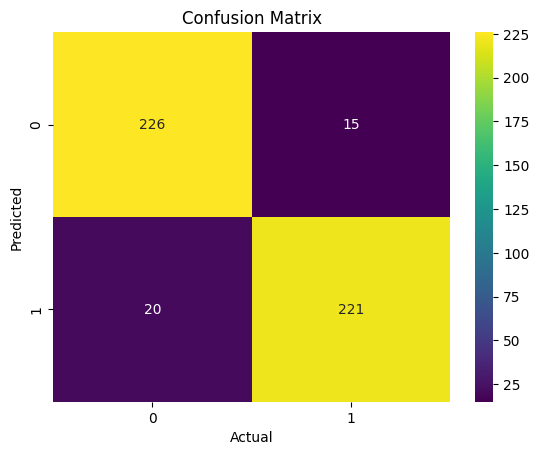

In [60]:
# Visualizing the confusion matrix
sns.heatmap(confusion_matrix(y1_test, ypredann), annot=True,cmap='viridis',fmt="d");
# convert 2.4e+02 to 0.000024?
plt.title("Confusion Matrix")
plt.xlabel("Actual")
plt.ylabel("Predicted")
